In [1]:
library(ggplot2)
library(reshape2)

file1 <- "InputData/WHO_NREVSS_Clinical_Labs.csv"
# get the headers
headers <- read.csv(file1, skip = 1,  header = F, nrows = 1, as.is = T)
# get the rest of columns without headers
df <- read.csv(file1, skip = 2, header = F, sep = ",")
# combine hearders with data
colnames(df)= headers
df$WEEK <- formatC(df$WEEK, width = 2, flag="0")
df$WEEK <- paste(df$YEAR, df$WEEK)
df <-as.data.frame(apply(df,2,function(x)gsub('\\s+', '',x)))                     

# remove the data after Jan 27th, week4
df <- df[1:(nrow(df)-2),]

# need numeric values to plot your data correctly
df$TOTAL_A <- as.numeric(as.character(df$TOTAL_A))
df$TOTAL_B <- as.numeric(as.character(df$TOTAL_B))
df$PERCENT_POSITIVE <- as.numeric(as.character(df$PERCENT_POSITIVE))
df$PERCENT_A <- as.numeric(as.character(df$PERCENT_A))
df$PERCENT_B <- as.numeric(as.character(df$PERCENT_B))
                         
new_df_Total <- df[,c("WEEK", "TOTAL_A", "TOTAL_B")]
new_df_Total <- melt(new_df_Total, id.vars='WEEK')

new_df_pct <- df[,c("PERCENT_POSITIVE", "PERCENT_A", "PERCENT_B")]
new_df_pct1 <- rbind(new_df_pct,new_df_pct)
                         
final_data <- cbind(new_df_Total,new_df_pct1)                  

pdf 
  2

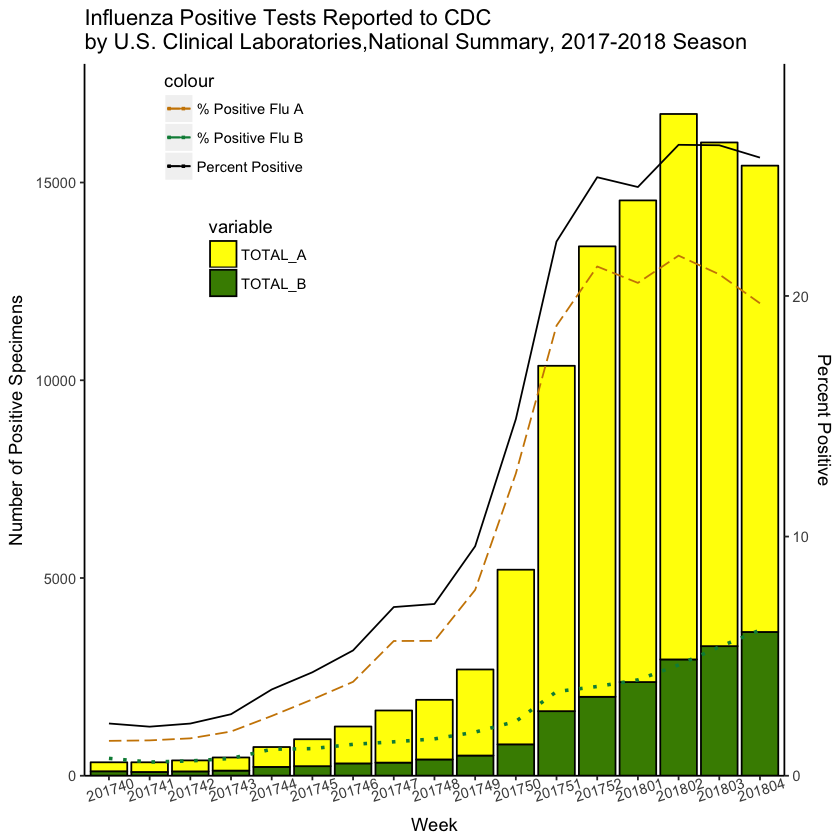

In [5]:
p <- ggplot(final_data, aes(as.character(WEEK), value, fill = variable)) + 
  geom_bar(stat='identity', color = "black") + coord_cartesian(ylim=c(0,18000)) +
  scale_fill_manual(values = c( "yellow1", "chartreuse4")) + 
  xlab("Week") + ylab("Number of Positive Specimens") 
 

p <- p + geom_line(aes(y = PERCENT_POSITIVE*600, group = 1, color = "Percent Positive"), size = 0.5) + 
  geom_line(aes(y = PERCENT_A*600, group = 1, color = "% Positive Flu A"),linetype = "longdash", size = 0.5) + 
  geom_line(aes(y = PERCENT_B*600, group = 1, color = "% Positive Flu B"), linetype = "dotted", size = 1)
# set second y-axis on right
p <- p + scale_y_continuous(sec.axis = sec_axis(~.*0.00165, name = "Percent Positive"), expand = c(0, 0))
# modifying line colours and theme options
p <- p + scale_colour_manual(values=c("orange3","springgreen4","black"))
# add title
p <- p + labs(title = "Influenza Positive Tests Reported to CDC \nby U.S. Clinical Laboratories,National Summary, 2017-2018 Season")
p <- p + theme(
  legend.position = c(0.1, 1),
  legend.justification = c("left", "top"),
  legend.box.just = "right",
  legend.margin = margin(6, 6, 6, 6)
)
#set up the x-axis label 17 degree angle inclinde, easily to look at the week
p <- p + theme(axis.text.x = element_text(angle = 17)) 
p <- p + theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))

p



png(filename="part2_outputGraphs/pic1_Influenza national summary.png")
plot(p)
dev.off()